<a href="https://colab.research.google.com/github/JeetKaria06/AutoAttendanceSystem/blob/master/Indian_Food_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Traditional Indian Dishes

> * Dataset contains 255 records.
* There are 9 columns.

Kaggle helped us in getting dataset of Indian traditional dishes.

> * Language used   $\;$ $\;$ $\;$ $\;$ $\;$ $\;$ $\;$ $\;$           : Python
* Data Visualization library   : Plotly in Python and matplotlib
* Data Processing     $\;$  $\;$ $\;$ $\;$ $\;$ $\;$ $\;$ $\:$       : Pandas' Dataframes, sklearn


# **Dependency Installation**

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 317kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **Data Importing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/DAV_Project_Indian_food_analysis')

In [ ]:
%cd /content/drive/My Drive/DAV_Project_Indian_food_analysis

/content/drive/My Drive/DAV_Project_Indian_food_analysis


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import umap

df = pd.read_csv("indian_food.csv")

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


# **Data Cleaning**
* We are replacing negative time values in 'cooking_time' and 'preparation_time' columns with median of that column.
* And undefined/garbage values in 'state', 'region' and 'flavour_profile' are replaced with 'unknown'.
* We even need to replace NaN (not null) values in the region column.



In [ ]:
df.prep_time.replace(-1, df.prep_time.median(), regex = True, inplace = True)
df.cook_time.replace(-1, df.cook_time.median(), regex = True, inplace = True)
df.flavor_profile.replace('-1', 'unknown', regex = True, inplace = True)
df.state.replace('-1', 'unknown', regex = True, inplace = True)
df.region.replace('-1', 'unknown', regex = True, inplace = True)

df['region'].fillna('unknown', inplace = True)

# **Data Visualization**
* Data is processed and converted to different visualizations, so that anyone can interpret it and derive meaningful inferences from it.

### Data Visualization theme

For Dark theme, 
<br> 
keep bgcolor = '#383838', and fgcolor = 'white'
<br>

For light theme,
<br>
keep bgcolor = 'white', and fgcolor = '#383838'

In [ ]:
bgcolor = 'white'
fgcolor = '#383838'

## Distribution of Dishes based on Veg and Non Veg

### Inferences

* Majority of dishes in the data is vegeterian i.e. $88.6\%$.
* And the remaining $11.4\%$ is non-veg.

In [ ]:
df_vnv = df['diet'].value_counts().reset_index()
fig = go.Figure(go.Pie(labels=df_vnv['index'], values=df_vnv['diet']))
 
display(df_vnv)
 
fig.update_layout(
    title={
        'text': 'Distribution of Dishes based on Veg and Non Veg',
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor, 
    legend=dict(
        font_color=fgcolor, 
        font_size=18), 
    font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ))
 
fig.update_traces(
    textfont_size=22, 
    opacity=0.95,
    marker=dict(colors=['#507b0d', '#e8425b'], 
                line=dict(
                    color=bgcolor, 
                    width=5)
                )
    )
 
fig.show()

,index,diet
0,vegetarian,226
1,non vegetarian,29


## Number of Ingredients Vs Number of Dishes

### Inferences
* Most number of dishes ($139$ dishes) uses $5$ ingredients.
* Only $1$ dish is made from $10$ ingredients which are maximum number of ingredients used in making any dish.

In [ ]:
# Number of Ingredients vs Number of Dishes

df_ID = pd.DataFrame({'Dishes':[], 'Ingredients':[]})
no_of_ingredients = [0]*11
for i in df.ingredients:
  ing_count=len(i.split(", ")) 
  no_of_ingredients[(ing_count)]+=1

for i in range(len(no_of_ingredients)):
  df_ID = df_ID.append({'Dishes': no_of_ingredients[i], 'Ingredients': i}, ignore_index=True)
display(df_ID)
fig = go.Figure(go.Scatter(
        x=df_ID['Ingredients'],
        y=df_ID['Dishes'],
        mode="markers+lines",
        name="steepest",
        line=dict(
            color=fgcolor,
            width=0.6
        ),
        hovertemplate="Total Ingredients : %{x}<br>Number of Dishes: %{y}"
      ))

fig.add_bar(x=df_ID['Ingredients'], 
            y=df_ID['Dishes'],
            hovertemplate="Total Ingredients : %{x}<br>Number of Dishes: %{y}",
            marker = dict(
                color=fgcolor,
                opacity=0.6
            ))
    

fig.update_layout(
    title = {
       'text': 'Number of Ingredients Vs Number of Dishes',
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top' 
    },
    plot_bgcolor = bgcolor,
    paper_bgcolor = bgcolor,
    font = dict(
        color = fgcolor,
        size = 14
    ),
    xaxis_title = 'Number of Ingredients',
    yaxis_title = 'Number of Dishes',
    xaxis = dict(
        showgrid=False,
        linecolor = fgcolor,
        showline = True
    ),
    yaxis = dict(
        showgrid=False,
        showline=True,
        linecolor = fgcolor
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    showlegend=False
)

fig.show()

,Dishes,Ingredients
0,0.0,0.0
1,0.0,1.0
2,20.0,2.0
3,36.0,3.0
4,40.0,4.0
5,139.0,5.0
6,14.0,6.0
7,2.0,7.0
8,2.0,8.0
9,1.0,9.0


## Statewise distribution of dishes based on Veg and Non Veg

### Inferences

* Gujarat has most number of traditional dishes of which all are vegeterian dishes.
* Uttrakhand has only 1 vegeterian dish.

In [ ]:
df_vnv_states = pd.DataFrame({'State':[], 'Diet':[], 'Dish_Count':[]})

vnv_state = {}
for i in range(len(df.ingredients)):
    if df['state'][i] not in vnv_state.keys():
      vnv_state[df['state'][i]] = {}
      vnv_state[df['state'][i]]['veg'] = 0
      vnv_state[df['state'][i]]['nonveg'] = 0
    
    if df['diet'][i] == 'vegetarian':
      vnv_state[df['state'][i]]['veg'] += 1
    else:
      vnv_state[df['state'][i]]['nonveg'] += 1
cnt=0
for i in vnv_state.keys():
  df_vnv_states = df_vnv_states.append({'State': i, 'Diet': 'veg', 'Dish_Count': vnv_state[i]['veg']}, ignore_index=True)
  df_vnv_states = df_vnv_states.append({'State': i, 'Diet': 'non-veg', 'Dish_Count': vnv_state[i]['nonveg']}, ignore_index=True)
  cnt += (vnv_state[i]['veg'] + vnv_state[i]['nonveg'])

display(df_vnv_states.head())
fig =px.sunburst(df_vnv_states, values='Dish_Count', path=['State', 'Diet'], color='State', color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(
        go.Sunburst(hovertemplate='%{label}<br>Dish_Count: %{value} '),
        insidetextorientation='radial',       
    )

fig.update_layout(
    title={
        'text': 'Statewise distribution of dishes based on Veg and Non Veg',
        'y':0.96,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor, 
    legend=dict(
        font_color=fgcolor, 
        font_size=18), 
    font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    margin = dict(l=0, r=0, b=0))

fig.update_traces(
    textfont_size=18, 
    marker=dict(colors=['#507b0d', '#e8425b'], 
                line=dict(
                    color=bgcolor, 
                    width=0.5)
                )
    )


fig.show()

,State,Diet,Dish_Count
0,West Bengal,veg,19.0
1,West Bengal,non-veg,5.0
2,Rajasthan,veg,6.0
3,Rajasthan,non-veg,0.0
4,Punjab,veg,28.0


## Ingredients v/s their use in number of dishes statewise

* Here, we have tried to find the popular ingredients based on the number of dishes in which it is used.
* One can even see it statewise by just changing the value of the below given variable named 'state'.

## Inferences
* Sugar is the most used ingredient in West Bengal because it is used in 10 different dishes.

* In Karnataka, the ingredients like jaggery, coconut, ghee and curry leaves are most used.

In [ ]:
# Most popular ingredient
popular_ingredients={}
 
state='Gujarat'

for i in df[(df['state']==state)].ingredients:
  for ing in i.split(", "):
    if ing in popular_ingredients:
      popular_ingredients[ing]+=1
    else :
      popular_ingredients[ing]=1
 
 
popular_ingredients={k: v for k, v in (sorted(popular_ingredients.items(), key=lambda item: item[1]))}
 
df_popular_ingredients = pd.DataFrame({'ingredients':[], 'dish_count':[]})
for key,value in (popular_ingredients.items()):
  df_popular_ingredients = df_popular_ingredients.append({'ingredients':key,'dish_count':value}, ignore_index=True)
 
display(df_popular_ingredients.iloc[::-1].head())
fig = go.Figure(data=go.Scatter(
    x=df_popular_ingredients['ingredients'],
    y=df_popular_ingredients['dish_count'],
    mode='markers',
    marker=dict(
        size=26,
        color=[i for i in range(len(df_popular_ingredients['ingredients']))], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        line_width=0.7,
        showscale=False
    )
))
 
fig.update_layout(
    title = {
       'text': 'Ingredients Vs Their Use in Number of Dishes of '+ state,
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top' 
    },
    plot_bgcolor = bgcolor,
    paper_bgcolor = bgcolor,
    font = dict(
        color = fgcolor,
        size = 14
    ),
    xaxis_title = 'Ingredient Name',
    yaxis_title = 'Number of Dishes',
    xaxis = dict(
        showgrid=False,
        showline=True,
        linecolor = fgcolor
    ),
    yaxis = dict(
        showgrid = False,
        showline = True,
        linecolor = fgcolor
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
 
fig.show()

,ingredients,dish_count
113,bengal gram flour,6.0
112,sugar,6.0
111,sesame seeds,4.0
110,gram flour,4.0
109,baking soda,4.0


## Cooking_time + Preparation_time V/S statewise dishes
* Here we are finding the total time for dishes to prepare for them and cook them.
* Dishes are then divided in four parts i.e. Starter, Main Course, Dessert and Snacks.
* We are showing the top 5 most time taking dishes.

### Inferences
* Gujarat has doodhpak as largest total time dessert dish.
* Maharashtra's shrikhand takes most amount of time i.e. $730$ total minutes.

In [ ]:
#longest cooking time by course
dish_cooking_time={}
state = 'Gujarat'
for i in df[(df['state']==state)].index:
  data_dish = df.iloc[i]
  dish_cooking_time[data_dish['name']]={'course':data_dish['course'],'total_time':data_dish['prep_time']+data_dish['cook_time']}

df_dish_cooking_time=pd.DataFrame({'name':[],'course':[],'total_time':[]})

for key,value in (dish_cooking_time.items()):
  df_dish_cooking_time = df_dish_cooking_time.append({'name':key,'course':dish_cooking_time[key]['course'],'total_time':dish_cooking_time[key]['total_time']},ignore_index=True)

df_dish_cooking_time.sort_values(by=['total_time'], ascending=True, inplace=True)
df_dish_cooking_time = df_dish_cooking_time.iloc[::-1]
display(df_dish_cooking_time.head())

df_starter = df_dish_cooking_time[(df_dish_cooking_time['course']=='starter')].head().iloc[::-1]
df_dessert = df_dish_cooking_time[(df_dish_cooking_time['course']=='dessert')].head().iloc[::-1]
df_main_course = df_dish_cooking_time[(df_dish_cooking_time['course']=='main course')].head().iloc[::-1]
df_snack = df_dish_cooking_time[(df_dish_cooking_time['course']=='snack')].head().iloc[::-1]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Starter", "Dessert", "Main Course", "Snack"))

fig.add_trace(go.Bar(x=df_starter['total_time'], y=df_starter['name'], orientation='h', hovertemplate="Dish Name : %{y}<br>Total time: %{x}"),
              row=1, col=1)

fig.add_trace(go.Bar(x=df_dessert['total_time'], y=df_dessert['name'], orientation='h', hovertemplate="Dish Name : %{y}<br>Total time: %{x}"),
              row=1, col=2)

fig.add_trace(go.Bar(x=df_main_course['total_time'], y=df_main_course['name'], orientation='h',hovertemplate="Dish Name : %{y}<br>Total time: %{x}"),
              row=2, col=1)

fig.add_trace(go.Bar(x=df_snack['total_time'], y=df_snack['name'], orientation='h', hovertemplate="Dish Name : %{y}<br>Total time: %{x}"),
              row=2, col=2)

fig.update_layout(height=600, width=1200,
                  title = {
                    'text': "Cooking_time + Preparation_time V/S Dish of "+state+" state",
                      'y':0.95,
                      'x':0.45,
                      'xanchor': 'center',
                      'yanchor': 'top' 
                  },
                  title_font_color=fgcolor,
                  plot_bgcolor=bgcolor, 
                  paper_bgcolor=bgcolor, 
                  legend=dict(
                      font_color=fgcolor, 
                      font_size=18), 
                  font_size=20,
                  font = dict(
                      color = fgcolor,
                      size = 14),
                  showlegend=False,
                  hoverlabel=dict(
                      bgcolor="white",
                      font_size=16,
                      font_family="Rockwell"
                  ))

fig.update_xaxes(showgrid=False, showline=True, title_text='total_time (cook_time + prep_time) in minutes', linecolor = fgcolor)
fig.update_yaxes(showgrid=False, showline=True, linecolor = fgcolor)

fig.show()

,name,course,total_time
27,Undhiyu,main course,85.0
34,Turiya Patra Vatana sabji,main course,75.0
1,Doodhpak,dessert,70.0
19,Khandvi,snack,65.0
18,Khakhra,snack,60.0


## Cook_time V/S Prep_time V/S Total_ingredients
* This 3d plot allows us to visualize dishes based on their cooking time, preparation time and number of ingredients used.

### Inferences
* One can see in the below plot that shrikhand is acting as outlier because it's prep_time is just 10 minutes while cooking_time is 720 minutes and number of ingredients used are 4.
* Keri no ras has only 2 ingredients and it's prep_time is 2 minutes and cook_time is also 2 minutes, and so it is in the corner of the cube near origin.

In [ ]:
df_3d = pd.DataFrame({'name': [], 'state':[], 'prep_time':[], 'cook_time':[], 'total_ingredients':[]})

for i in df.index:
  ingredients = len((df['ingredients'][i]).split(', '))
  df_3d = df_3d.append({'name': df['name'][i], 'state': df['state'][i], 'prep_time': df['prep_time'][i], 'cook_time': df['cook_time'][i], 'total_ingredients': ingredients}, ignore_index=True)

display(df_3d.head())


fig = px.scatter_3d(df_3d, x='prep_time', y='cook_time', z='total_ingredients',
                    color='state',
                    hover_data=['name'],
                    color_discrete_sequence = px.colors.sequential.Rainbow_r,
                    opacity=0.5)

fig.update_layout(
    title={
        'text': 'Cook_time V/S Prep_time V/S Total_ingredients',
        'y':0.96,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor, 
    legend=dict(
        font_color=fgcolor, 
        font_size=16), 
    font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font = dict(
        color = fgcolor,
        size = 14),
    scene=dict(
        aspectmode="cube"
    ),
    margin = dict(l=0, r=0, b=0))
fig.show()


,name,state,prep_time,cook_time,total_ingredients
0,Balu shahi,West Bengal,45.0,25.0,4.0
1,Boondi,Rajasthan,80.0,30.0,3.0
2,Gajar ka halwa,Punjab,15.0,60.0,6.0
3,Ghevar,Rajasthan,15.0,30.0,10.0
4,Gulab jamun,West Bengal,15.0,40.0,8.0


## Dish count based on taste preferences regionwise and statewise
* Treemap allows us to aggregate dishes based on their flavor_profile, states, their region and atlast the country.

* This is called hierarchy based data visualization.


In [ ]:
dict_taste_dish_count = {}

cnt=0
for i in range(len(df['region'])):
  if df['region'][i] not in dict_taste_dish_count.keys():
    dict_taste_dish_count[df['region'][i]] = {}
  
  if df['state'][i] not in dict_taste_dish_count[df['region'][i]].keys():
    dict_taste_dish_count[df['region'][i]][df['state'][i]] = {}
  
  dict_taste_dish_count[df['region'][i]][df['state'][i]]={'sweet': 0, 'spicy': 0,'bitter':0,'sour':0, 'unknown': 0}
  


for i in range(len(df.state)):
  dict_taste_dish_count[df['region'][i]][df['state'][i]][df['flavor_profile'][i]] += 1

df_taste_dish_count = pd.DataFrame({'region':[], 'state':[], 'flavor_profile':[], 'dish_count':[]})

for i in dict_taste_dish_count.keys():
  for j in dict_taste_dish_count[i].keys():
    for k in dict_taste_dish_count[i][j].keys():
      df_taste_dish_count = df_taste_dish_count.append({'region': i, 'state': j, 'flavor_profile': k, 'dish_count': dict_taste_dish_count[i][j][k]}, ignore_index=True)




df_taste_dish_count["Country"] = "India" # in order to have a single root node
display(df_taste_dish_count.head())
fig = px.treemap(df_taste_dish_count, path=['Country', 'region', 'state', 'flavor_profile'], values='dish_count')
fig.update_layout(
    title={
        'text': 'Dish count based on taste preferences regionwise and statewise',
        'y':0.96,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor,
    font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font = dict(
        color = fgcolor,
        size = 14),
    margin = dict(l=0, r=0, b=0)
)
fig.show()

,region,state,flavor_profile,dish_count,Country
0,East,West Bengal,sweet,16.0,India
1,East,West Bengal,spicy,6.0,India
2,East,West Bengal,bitter,0.0,India
3,East,West Bengal,sour,0.0,India
4,East,West Bengal,unknown,2.0,India


## WordClouds based on statewise Dishes
* Here the dishes are divided into Starter, Main Course, Dessert and Snacks.
* The dishes are divided for specific defined state.
* Wordcloud is a novelty visual representation of text data and in our case the names of the dishes.

(-0.5, 399.5, 199.5, -0.5)

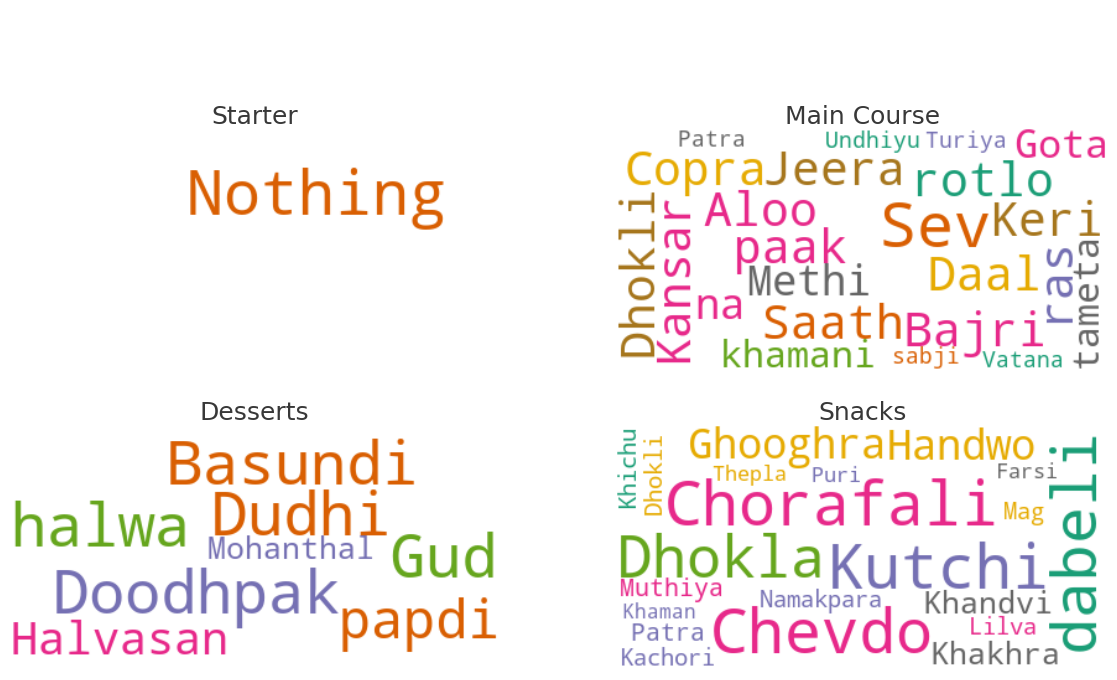

In [ ]:
state = 'Gujarat'

cmap = 'Dark2'
fig = plt.figure(figsize=(20,10))
fig.suptitle("WordClouds based on dishes in "+state+" state", fontsize=30, color='white', x=0.5, y=1.05)
# Starter
ax = fig.add_subplot(2,2,1)
if len(df[(df.course == 'starter') & (df.state == state)].index)==0:
  wordCloud = WordCloud(
    background_color=bgcolor,
    max_font_size = 50,
    colormap=cmap).generate(' Nothing')
else:
  wordCloud = WordCloud(
    background_color=bgcolor,
    max_font_size = 50,
    colormap=cmap).generate(' '.join(df[(df.course == 'starter') & (df.state == state)].name))
ax.set_title('Starter', fontsize=25, color=fgcolor)
ax.imshow(wordCloud, interpolation = 'bilinear')
ax.axis('off')

# Main Course
ax = fig.add_subplot(2,2,2)
if len(df[(df.course == 'main course') & (df.state == state)].index)==0:
  wordCloud = WordCloud(
    background_color=bgcolor,
    max_font_size = 50,
    colormap=cmap).generate(' Nothing ')
else:
  wordCloud = WordCloud(
      background_color=bgcolor,
      max_font_size = 50,
    colormap=cmap).generate(' '.join(df[(df.course == 'main course') & (df.state == state)].name))
ax.set_title('Main Course', fontsize=25, color=fgcolor)
ax.imshow(wordCloud, interpolation = 'bilinear')
ax.axis('off')

# Dessert
ax = fig.add_subplot(2,2,3)
if len(df[(df.course == 'dessert') & (df.state == state)].index)==0:
  wordCloud = WordCloud(
    background_color=bgcolor,
    max_font_size = 50,
    colormap=cmap).generate(' Nothing ')
else:
  wordCloud = WordCloud(
      background_color=bgcolor,
      max_font_size = 50,
    colormap=cmap).generate(' '.join(df[(df.course == 'dessert') & (df.state == state)].name))
ax.set_title('Desserts', fontsize=25, color=fgcolor)
ax.imshow(wordCloud, interpolation = 'bilinear')
ax.axis('off')

# Snack
ax = fig.add_subplot(2,2,4)
if len(df[(df.course == 'snack') & (df.state == state)].index)==0:
  wordCloud = WordCloud(
    background_color=bgcolor,
    max_font_size = 50,
    colormap=cmap).generate(' Nothing ')
else:
  wordCloud = WordCloud(
      background_color=bgcolor,
      max_font_size = 50,
    colormap=cmap).generate(' '.join(df[(df.course == 'snack') & (df.state == state)].name))
ax.set_title('Snacks', fontsize=25, color=fgcolor)
ax.imshow(wordCloud, interpolation = 'bilinear')
ax.axis('off')

## Making ingredients Vector

All the ingredients are first combined into one big array.

In [ ]:
total_ingredients=[]
for i in df.ingredients:
  for j in i.split(", "):
    total_ingredients.append(j)

total_ingredients = set(total_ingredients)
total_ingredients=np.array(list(total_ingredients))
display(total_ingredients)

array(['ridge gourd', 'Ladies finger', 'Moong beans', 'Tomato',
       'litre milk', 'sauce', 'Chana dal', 'soaked rice', 'coconut oil',
       'Coconut oil', 'dahi', 'Pav', 'slivered almonds',
       'pearl millet flour', 'turmeric', 'chickpeas', 'wine vinegar',
       'Canned coconut milk', 'dry chilli', 'Banana flower', 'dates',
       'bread crumbs', 'cashews', 'honey', 'Biryani masala', ' jaggery',
       'alum powder', 'bay leaf', 'chili powder', 'mixed vegetables',
       'Rice', 'maida flour', 'Black lentils', 'brinjal', 'potato',
       'Green garlic chutney', 'steamer', 'masala', 'avocado oil',
       'capsicum', 'spices', 'star anise', 'cinnamon stick', 'Brown rice',
       'lentil flour', 'cardamom', 'green chilies', 'chicken chunks',
       'powdered sugar', 'ginger powder', 'amchur powder', 'black pepper',
       'sugar', 'badam', 'masoor dal', 'Red pepper', 'chana daal',
       'mung bean', 'milk', 'whole urad dal', 'Bitter gourd', 'mutton',
       'Bombay duck', 'whole 

## Similarity Heatmap of Dishes based on their ingredients
* Here we are correlating multiple dishes to each other based on their ingredient_vectors.
* We are making use of cosine similarity inbuilt function which finds coorelation value.

### Formula used for similarity

similarity $ = cos({\theta})=\frac{A.B}{||A||\,||B||} = \frac{\sum_{i=1}^n A_i B_i}{\sqrt{\sum_{i=1}^n A_i^2}\sqrt{\sum_{i=1}^n B_i^2}}$

In [ ]:
num = 255  # Number of Dishes

total_ingredients=[]
for i in df.ingredients:
  for j in i.split(", "):
    total_ingredients.append(j)

total_ingredients = set(total_ingredients)
total_ingredients=np.array(list(total_ingredients))


df_new = df

df_new = df_new.drop(columns = ['ingredients'])

all_arr = []
for i in range(len(df_new.name)):
  tarr = df.ingredients[i].split(", ")
  
  t_ing_arr = [0] * len(total_ingredients)
  for j in range(len(total_ingredients)):
    if total_ingredients[j] in tarr:
      t_ing_arr[j] = 1.0
  all_arr.append(t_ing_arr)

df_new['ing_vec'] = all_arr


cos_matrix = cosine_similarity(df_new.iloc[:num]['ing_vec'].tolist(), df_new.iloc[:num]['ing_vec'].tolist())

fig = go.Figure(data=go.Heatmap(
                    x=df_new['name'].iloc[:num].tolist(),
                    y=df_new['name'].iloc[:num].tolist(),
                    z=cos_matrix))

fig.update_layout(
    title={
        'text': 'Similarity Heatmap of Dishes based on their ingredients',
        'y':0.96,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor,
    font_size=20,
    width=1000,
    height=1000,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font = dict(
        color = fgcolor,
        size = 14),
    margin = dict(l=0, r=0, b=0)
)

fig.show()

## Similarity heatmap of statewise dishes based on ingredients
* One can see his/her statewise dish and find similarity between dishes based on the ingredients used.

* Bit vector is made whose length is equal to that of total_ingredients array and ingredients which are present that indexes are set to $1$, others to $0$.

* That bit vector is called as ingredient vector and it is made for individual dishes.

### Inferences
* The diagonal line is yellow showing that same food is totally equal.
* Doodhpak and Dudhi no halwo are also having correlation value equal to 1.

In [ ]:
num = 255  # Number of Dishes
state = 'Gujarat'

total_ingredients=[]
for i in df.ingredients:
  for j in i.split(", "):
    total_ingredients.append(j)

total_ingredients = set(total_ingredients)
total_ingredients=np.array(list(total_ingredients))


df_new = df[df['state']==state]

df_new = df_new.drop(columns = ['ingredients'])

all_arr = []
for i in range(len(df_new.name)):
  tarr = df.ingredients[i].split(", ")
  
  t_ing_arr = [0] * len(total_ingredients)
  for j in range(len(total_ingredients)):
    if total_ingredients[j] in tarr:
      t_ing_arr[j] = 1.0
  all_arr.append(t_ing_arr)

df_new['ing_vec'] = all_arr


cos_matrix = cosine_similarity(df_new.iloc[:num]['ing_vec'].tolist(), df_new.iloc[:num]['ing_vec'].tolist())

fig = go.Figure(data=go.Heatmap(
                    x=df_new['name'].iloc[:num].tolist(),
                    y=df_new['name'].iloc[:num].tolist(),
                    z=cos_matrix))

fig.update_layout(
    title={
        'text': 'Similarity Heatmap of Dishes of '+state+' state based on their ingredients',
        'y':0.96,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=fgcolor,
    plot_bgcolor=bgcolor, 
    paper_bgcolor=bgcolor,
    font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font = dict(
        color = fgcolor,
        size = 14),
    margin = dict(l=0, r=0, b=0)
)

fig.show()

## KMeans Clustering of dishes
* One can see from the overall heatmap that there are 3 different groups of dishes.
* So, we are clustering the dishes using kmeans into 3 clusters.

## Dimensionality Reduction using UMAP
* Original data was having 425 dimensions which is not possible to visualize.
* SO, using UMAP (Uniform Manifold Approximation and Projection) we have reduced dimension of the data to 2 and retaining meaningful properties of the original data.

### How UMAP works?
This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional space, projects them onto the low dimensional space, and calculates the distance between points in this low dimensional space. It then uses Stochastic Gradient Descent to minimize the difference between these distances. 

In [ ]:
total_ingredients=[]
for i in df.ingredients:
  for j in i.split(", "):
    total_ingredients.append(j)

total_ingredients = set(total_ingredients)
total_ingredients=np.array(list(total_ingredients))

all_arr = []
for i in range(len(df.state)):
  tarr = df['ingredients'][i].split(', ')
  t_ing_arr = [0.0] * len(total_ingredients)
  for j in range(len(total_ingredients)):
    if total_ingredients[j] in tarr:
      t_ing_arr[j] = 1.0
  all_arr.append(t_ing_arr)


reducer = umap.UMAP(random_state=0)
projection = reducer.fit_transform(all_arr)

kmeans = KMeans(n_clusters=3, random_state=0).fit(projection)

fig = go.Figure(data=go.Scatter(
    x=projection[:, 0],
    y=projection[:, 1],
    marker=dict(
      color = kmeans.labels_,
      colorscale='rainbow', # one of plotly colorscales  
    ),
    hovertext = df['name'],
    mode='markers'))

fig.update_layout(
    title = {
       'text': 'Clustering of dishes based on their ingredients similarity',
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top' 
    },
    plot_bgcolor = bgcolor,
    paper_bgcolor = bgcolor,
    font = dict(
        color = fgcolor,
        size = 14
    ),
    xaxis_title = 'Reduced Dimension 1',
    yaxis_title = 'Reduced Dimension 2',
    xaxis = dict(
        showgrid=False,
        showline=True,
        zeroline=False,
        linecolor = fgcolor
    ),
    yaxis = dict(
        showgrid=False,
        showline=True,
        zeroline=False,
        linecolor = fgcolor
    ),
    hoverlabel = dict(
        bgcolor = "white",
        font_size = 16,
        font_family = "Rockwell"
    )
)
fig.show()

In [ ]:
# Thank You